# <center> EXPLORING GLOBAL TERRORISM <Center>

## Problem Statement:

Terrorism is a major issue that affects many countries around the world, causing harm to people and creating instability. The number of terrorist attacks, where they happen, and why they happen can be different in various regions. To find ways to stop terrorism, we need to understand its causes, patterns, and impact.

## Objective:

The goal of this project is to study and analyze global terrorism using available data. By looking at where and when terrorist attacks happen, who is involved, and what causes them, we can gain insights into how terrorism works and how to deal with it.

## About Dataset

- iso3c    : Three-letter country code (ISO alpha-3).
- Country  : Full name of the country.
- Rank     : Rank based on severity of incidents.
- Score    : Severity score for the country's incidents.
- Incidents: Total reported incidents in the year.
- Fatalities: Number of deaths caused by incidents.
- Injuries  : Number of injuries caused by incidents.
- Hostages  : Number of hostages taken during incidents.
- Year    : Year the data was recorded.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [3]:
df=pd.read_csv("Global Terrorism Index 2023.csv")
df

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012
...,...,...,...,...,...,...,...,...,...
1788,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
1789,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
1790,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
1791,ZMB,Zambia,93,0.000000,0,0,0,0,2022


## Number of Rows and Columns

In [4]:
df.shape

(1793, 9)

There are 1793 rows and 9 columns

## Information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


There is no null values in data

## Statistical Summary

In [6]:
df.describe()

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


## Columns


In [7]:
df.columns

Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')

## Number of Countries

In [8]:
df['Country'].nunique()

163

There are 163 countries that have suffered from terrorism.

## Unique Countries

In [9]:
df['Country'].unique()

array(['Iraq', 'Pakistan', 'Afghanistan', 'Syria', 'Yemen', 'Nigeria',
       'Somalia', 'India', 'Thailand', 'Russia', 'Turkey', 'Colombia',
       'Philippines', 'Algeria', 'Kenya',
       'Democratic Republic of the Congo', 'Egypt', 'Israel', 'Iran',
       'Myanmar', 'Norway', 'Mali', 'Libya', 'Sri Lanka', 'Sudan',
       'Indonesia', 'Lebanon', 'Nepal', 'Ethiopia', 'China', 'Peru',
       'Burundi', 'Uganda', 'Palestine', 'United Kingdom', 'Belarus',
       'Bangladesh', 'France', 'United States of America', 'Tajikistan',
       'Georgia', 'Bulgaria', "Cote d' Ivoire",
       'Central African Republic', 'Greece', 'Morocco', 'Kazakhstan',
       'Guatemala', 'Bahrain', 'Ukraine', 'Rwanda', 'Saudi Arabia',
       'Mauritania', 'Tunisia', 'Spain', 'Italy', 'Kosovo', 'Cameroon',
       'Germany', 'Niger', 'Eritrea', 'Mexico', 'Argentina', 'Chile',
       'Paraguay', 'El Salvador', 'Jordan', 'Serbia', 'Azerbaijan',
       'Honduras', 'Venezuela', 'Madagascar', 'Angola', 'Sierra Leone',

## Checking for Null Values

In [10]:
df.isnull().sum()

iso3c         0
Country       0
Rank          0
Score         0
Incidents     0
Fatalities    0
Injuries      0
Hostages      0
Year          0
dtype: int64

## Check Duplicates

In [11]:
df.duplicated().sum()

0

## EDA

### 1. Total Number of incidents took place in each Year

In [12]:
yearly_totals=df.groupby('Year')['Incidents'].sum().reset_index()
yearly_totals

,Year,Incidents
0,2012,4711
1,2013,4371
2,2014,3546
3,2015,3632
4,2016,4210
5,2017,4517
6,2018,4829
7,2019,4118
8,2020,4541
9,2021,5443


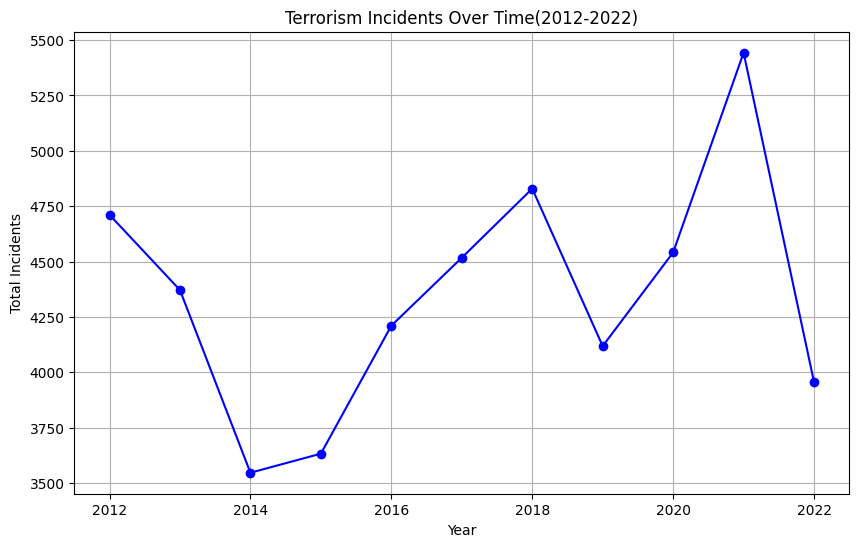

In [13]:
## line plot to view the trend

plt.figure(figsize=(10,6))
plt.plot(yearly_totals['Year'],yearly_totals['Incidents'],marker='o',linestyle='-',color='b')
plt.title("Terrorism Incidents Over Time(2012-2022)")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.grid(True)
plt.show()

**INSIGHT:** <br>
The graph shows a steady increase in terrorism incidents worldwide. The highest number was in 2021, with over 5,500 incidents, while 2014 had the lowest, just above 3,500. There was a sharp rise in incidents between 2019 and 2020, indicating increased global conflict.

### 2.  Total Incidents Taken place in each country

In [14]:
total_incidents_country=df.groupby('Country')['Incidents'].sum().reset_index()

## Top 5 countries with highest total incidents
top5_countries=total_incidents_country.sort_values(by='Incidents',ascending=False).head()

print(top5_countries)

         Country  Incidents
66          Iraq      11183
0    Afghanistan       4443
109     Pakistan       3358
130      Somalia       2951
63         India       2872


In [15]:
df.dtypes

iso3c          object
Country        object
Rank            int64
Score         float64
Incidents       int64
Fatalities      int64
Injuries        int64
Hostages        int64
Year            int64
dtype: object

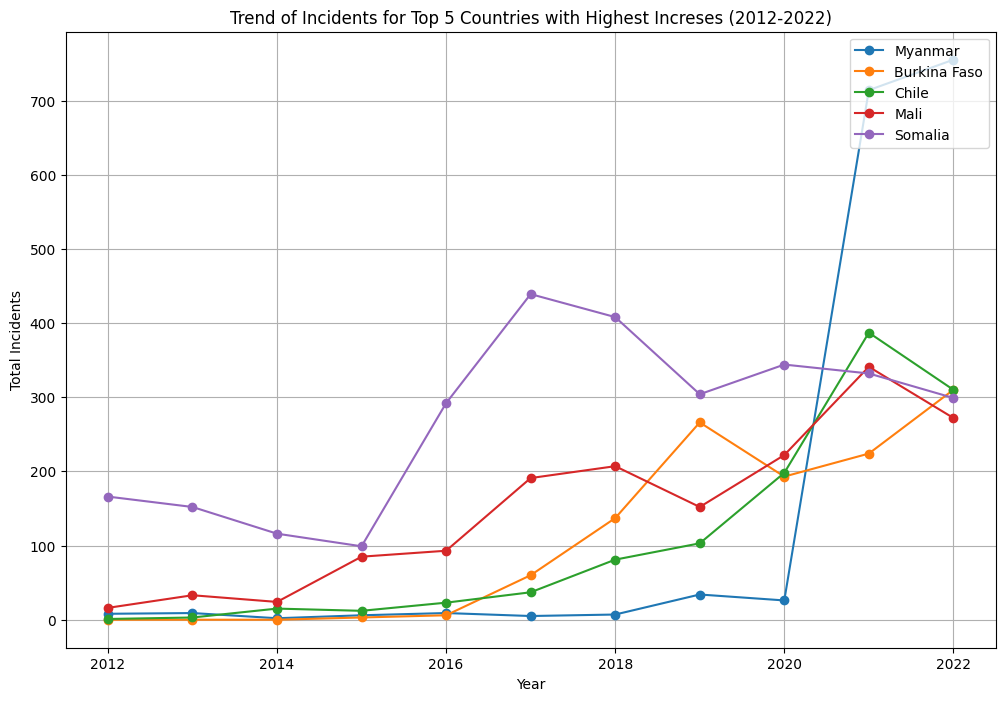

In [16]:
yearly_totals=df.groupby(['Year','Country'])['Incidents'].sum().reset_index()

pivot_table=yearly_totals.pivot(index='Country',columns='Year',values='Incidents').fillna(0)
increase=pivot_table[2022]-pivot_table[2012]

top_countries=increase.sort_values(ascending=False).head(5).index
top_countries_data=pivot_table.loc[top_countries]

plt.figure(figsize=(12,8))

for country in top_countries_data.index:
    plt.plot(top_countries_data.columns,top_countries_data.loc[country],marker='o',linestyle='-',label=country)
    
plt.title('Trend of Incidents for Top 5 Countries with Highest Increses (2012-2022)')
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**INSIGHT:**<br>
Myanmar had the biggest rise in incidents from 2020 to 2022, showing a major increase. Burkina Faso and Mali had a steady rise in incidents, showing ongoing problems. Chile saw a small increase from 2012 to 2018, then a drop, which might mean things improved. Somalia had a slow increase in incidents over the years.

### 3. Top 5 countries with the largest decrease in incidents between 2012 and 2022

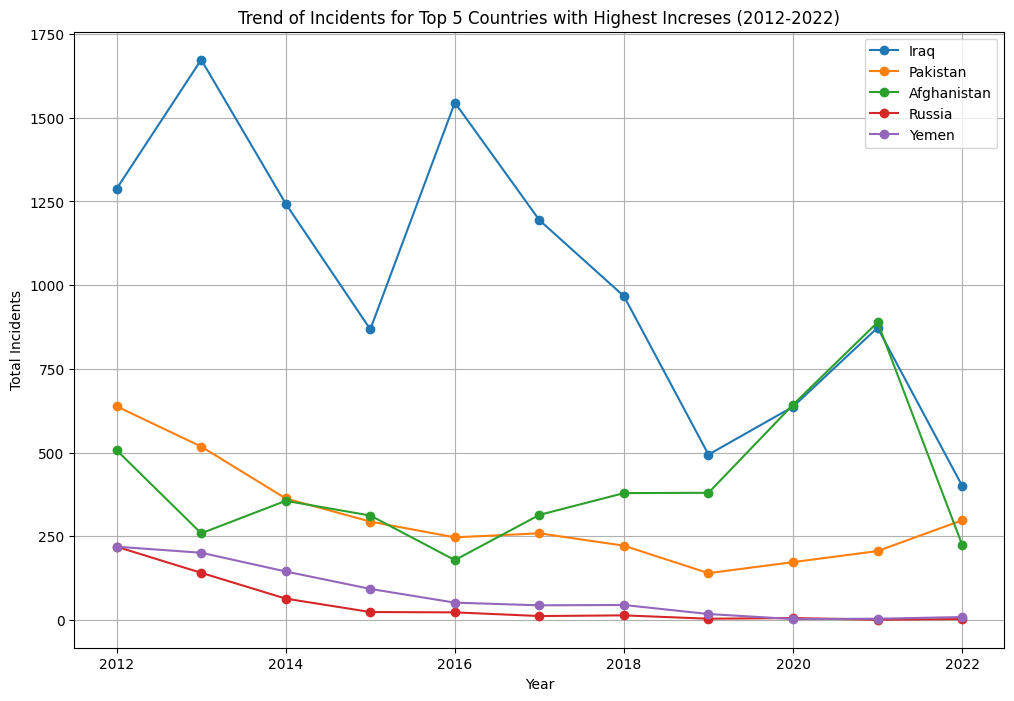

In [17]:
yearly_totals=df.groupby(['Year','Country'])['Incidents'].sum().reset_index()

pivot_table=yearly_totals.pivot(index='Country',columns='Year',values='Incidents').fillna(0)
decrease=pivot_table[2012]-pivot_table[2022]

top_countries=decrease.sort_values(ascending=False).head(5).index
top_countries_data=pivot_table.loc[top_countries]

plt.figure(figsize=(12,8))

for country in top_countries_data.index:
    plt.plot(top_countries_data.columns,top_countries_data.loc[country],marker='o',linestyle='-',label=country)
    
plt.title('Trend of Incidents for Top 5 Countries with Highest Increses (2012-2022)')
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**INSIGHT :**<br>
Iraq and Pakistan have fewer incidents over time, suggesting that efforts to reduce them have worked. However, Russia, Afghanistan, and Yemen have more incidents, showing a worsening situation. Iraq had the most incidents in 2012, but this dropped by 2022. Yemen, with the least incidents in 2012, has seen an increase, especially by 2022..

### 4.Top 10 countries with the highest number of incidents  from 2012 to 2022

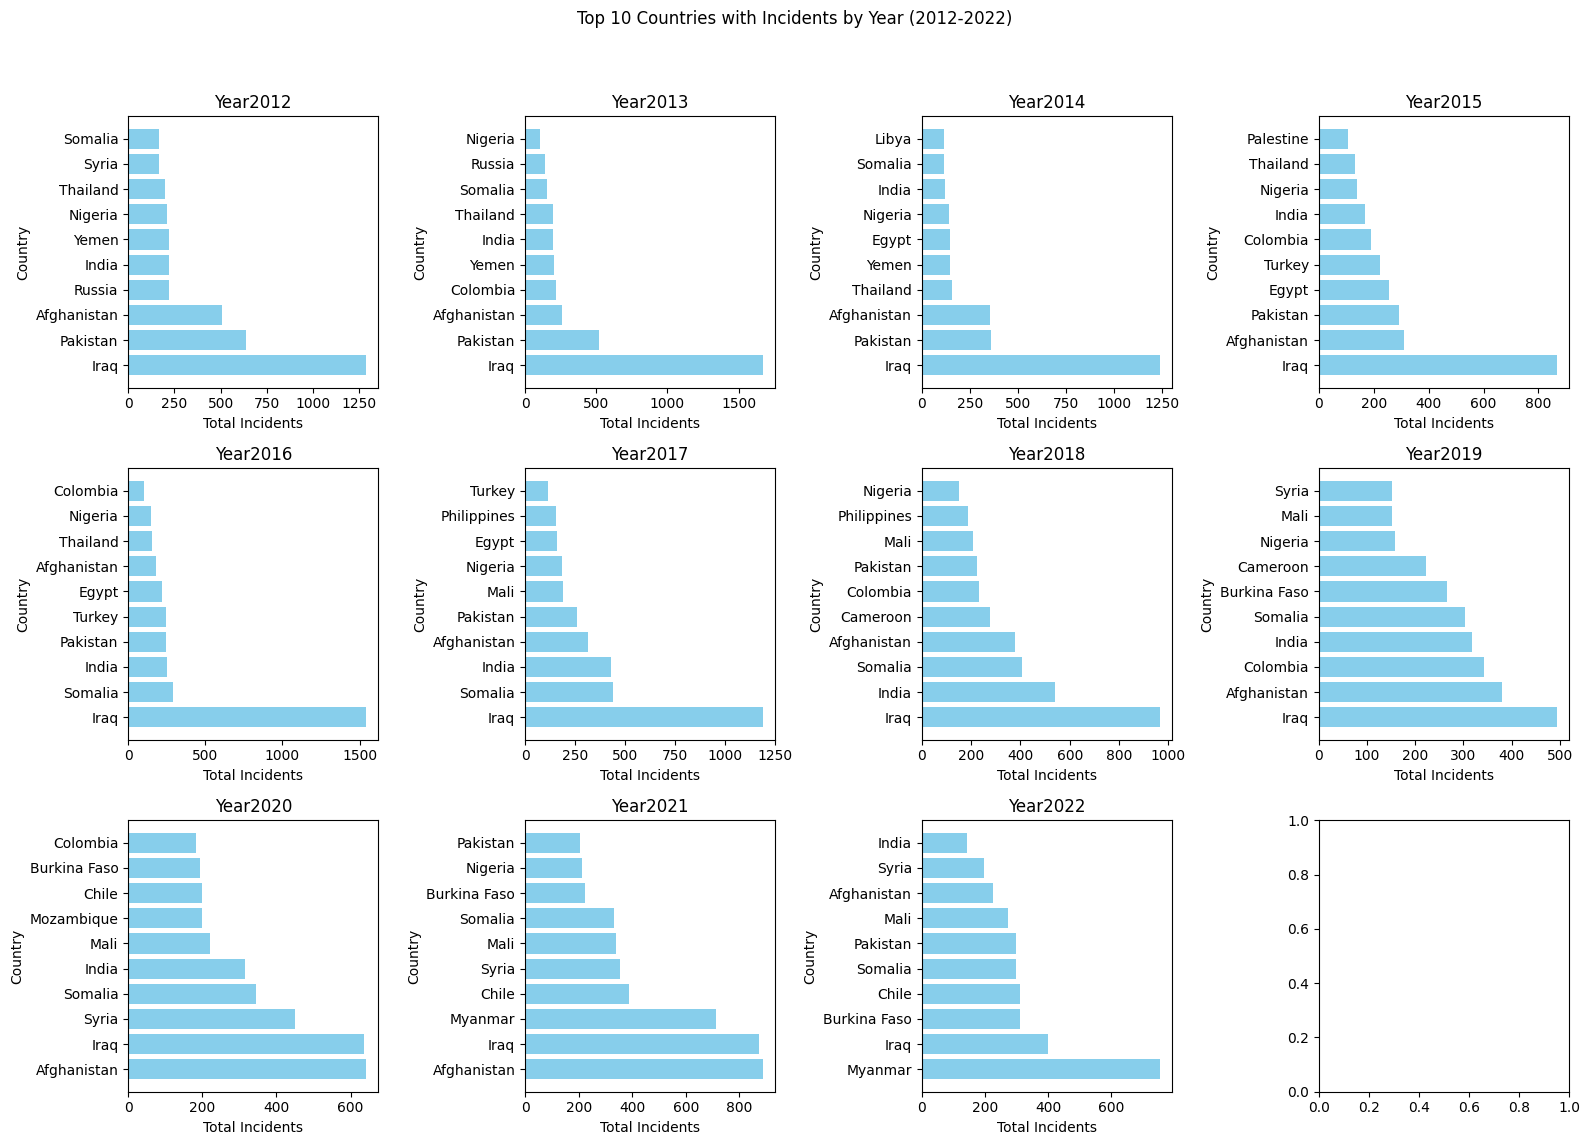

In [18]:
top_countries_by_year=pd.DataFrame(columns=['Year','Country','Incidents'])

fig,axs=plt.subplots(nrows=3,ncols=4,figsize=(16,12))
fig.suptitle('Top 10 Countries with Incidents by Year (2012-2022)')

for i ,year in enumerate(range(2012,2023)):
    incidents_year=df[df['Year']==year]
    
    top_countries_year=incidents_year.groupby('Country')['Incidents'].sum().reset_index()
    
    top_10_countries_year=top_countries_year.sort_values(by='Incidents',ascending=False).head(10)
    top_10_countries_year['Year']=year
    top_countries_by_year=pd.concat([top_countries_by_year,top_10_countries_year],ignore_index=True)
    
    row,col=i//4,i%4
    ax=axs[row,col]
    ax.barh(top_10_countries_year['Country'],top_10_countries_year['Incidents'],color='skyblue')
    ax.set_title(f'Year{year}')
    ax.set_xlabel('Total Incidents')
    ax.set_ylabel('Country')
                 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**INSIGHT :**

The countries that consistently appear in the top 10 across these years are Afghanistan, Pakistan, and Iraq. This suggests that these countries have been persistently affected by these incidents over this period.

### 5. Identify the top 5 years with the highest total fatalities

   Year  Fatalities
3  2015       10881
4  2016       10372
1  2013       10317
2  2014       10129
0  2012        9227


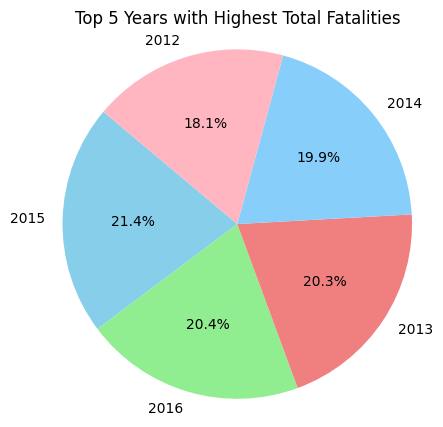

In [19]:
total_fatalities_by_year=df.groupby('Year')['Fatalities'].sum().reset_index()

## Top 5 years with highest total fatalities
top5_years=total_fatalities_by_year.sort_values(by='Fatalities',ascending=False).head()

print(top5_years)

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(top5_years['Fatalities'], labels=top5_years['Year'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.title('Top 5 Years with Highest Total Fatalities')
plt.axis('equal')  
plt.show()


**INSIGHTS:**

The highest fatalities occurred in 2015 and 2016, with over 10,000 deaths each. The years 2013, 2014, and 2012 also experienced high fatalities, all above 9,000. This highlights a period of significant fatalities between 2012 and 2016.

### 6. Identify the top 10 Countries with the highest total fatalities

         Country  Fatalities
66          Iraq        2974
105      Nigeria        2003
0    Afghanistan        1008
109     Pakistan         658
41         Egypt         481
160        Yemen         458
130      Somalia         335
23      Cameroon         292
149       Turkey         286
83         Libya         234


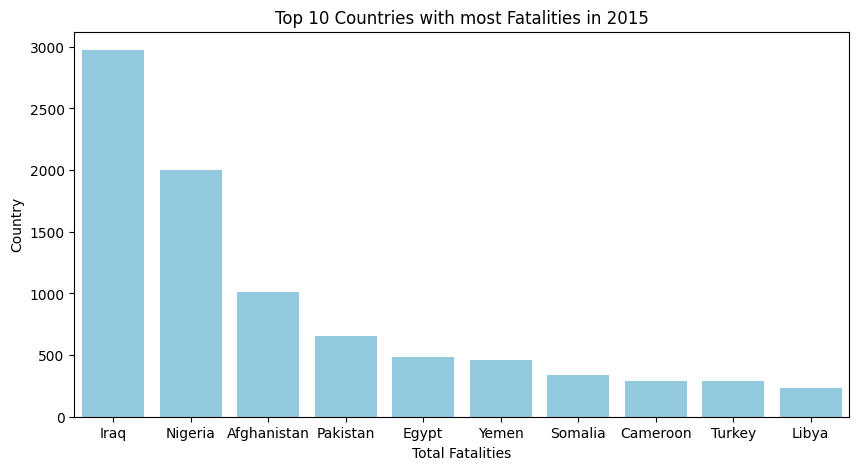

In [20]:
fatalities_2015=df[df['Year']==2015]
fatalities_by_country_2015=fatalities_2015.groupby('Country')['Fatalities'].sum().reset_index()
top_10_countries_2015=fatalities_by_country_2015.sort_values(by='Fatalities',ascending=False).head(10)
print(top_10_countries_2015)  

# plot a barplot to visualize data 
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_countries_2015,x='Country',y='Fatalities',color='Skyblue')
plt.title("Top 10 Countries with most Fatalities in 2015")
plt.xlabel("Total Fatalities")
plt.ylabel("Country")
plt.show()


**INSIGHTS:**

- Iraq and Nigeria had the highest fatalities, with over 2,000 deaths each.
- The years 2015 and 2016 saw the highest total fatalities, with more than 10,000 deaths in each year.
- Countries like Iraq and Pakistan showed a decrease in incidents, while Russia, Afghanistan, and Yemen saw an increase, indicating worsening situations.

### 7.Display the number of occurrences of Rank 1 countries in the global terrorism dataset

In [21]:
rank_1_data=df[df['Rank']==1]
rank_1_counts=rank_1_data['Country'].value_counts()
for country,count in rank_1_counts.items():
    print(f'Country: {country},Count: {count}')

Country: Iraq,Count: 7
Country: Afghanistan,Count: 4


**INSIGHTS:**

- Iraq has ranked first 7 times. This suggests that iraq has frequently been at the top of this ranking whereas Afghanistan has also ranked first but less frequently than Iraq for 4 times

### 8.Visualize the number of incidents in Iraq and Afghanistan from 2012 to 2022

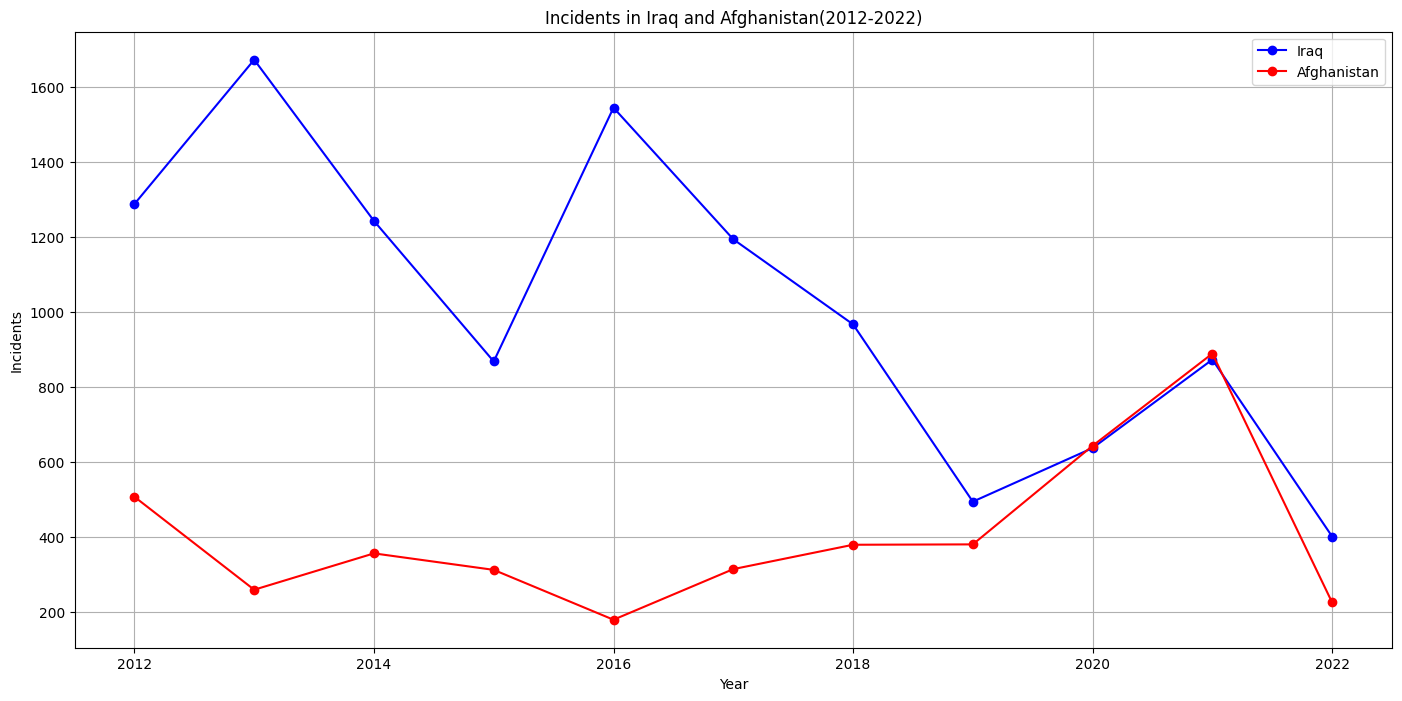

In [22]:
iraq_data=df[df['Country']=='Iraq']
afghanistan_data=df[df['Country']=='Afghanistan']

plt.figure(figsize=(17,8))
plt.plot(iraq_data['Year'],iraq_data['Incidents'],label='Iraq',marker='o',linestyle='-',color='blue')
plt.plot(afghanistan_data['Year'],afghanistan_data['Incidents'],label='Afghanistan',marker='o',linestyle='-',color='red')

plt.title("Incidents in Iraq and Afghanistan(2012-2022)")
plt.xlabel("Year")
plt.ylabel("Incidents")
plt.legend()
plt.grid(True)
plt.show()

**INSIGHTS:**

1. Both Iraq (represented by the blue line) and Afghanistan (represented by the red line) show a downward trend in incidents from 2016 and 2018 respectively to 2022. This suggests a decrease in these incidents over these periods in both countries

2. Iraq had peaks in the number of incidents in 2014 and 2016, suggesting that these years were particularly challenging

3. Afghanistan had a peak in the number of incidents in 2018, indicating a significant increase in incidents during that year.

### 9.Visualize the number of fatalities in Iraq and Afghanistan from 2012 to 2022

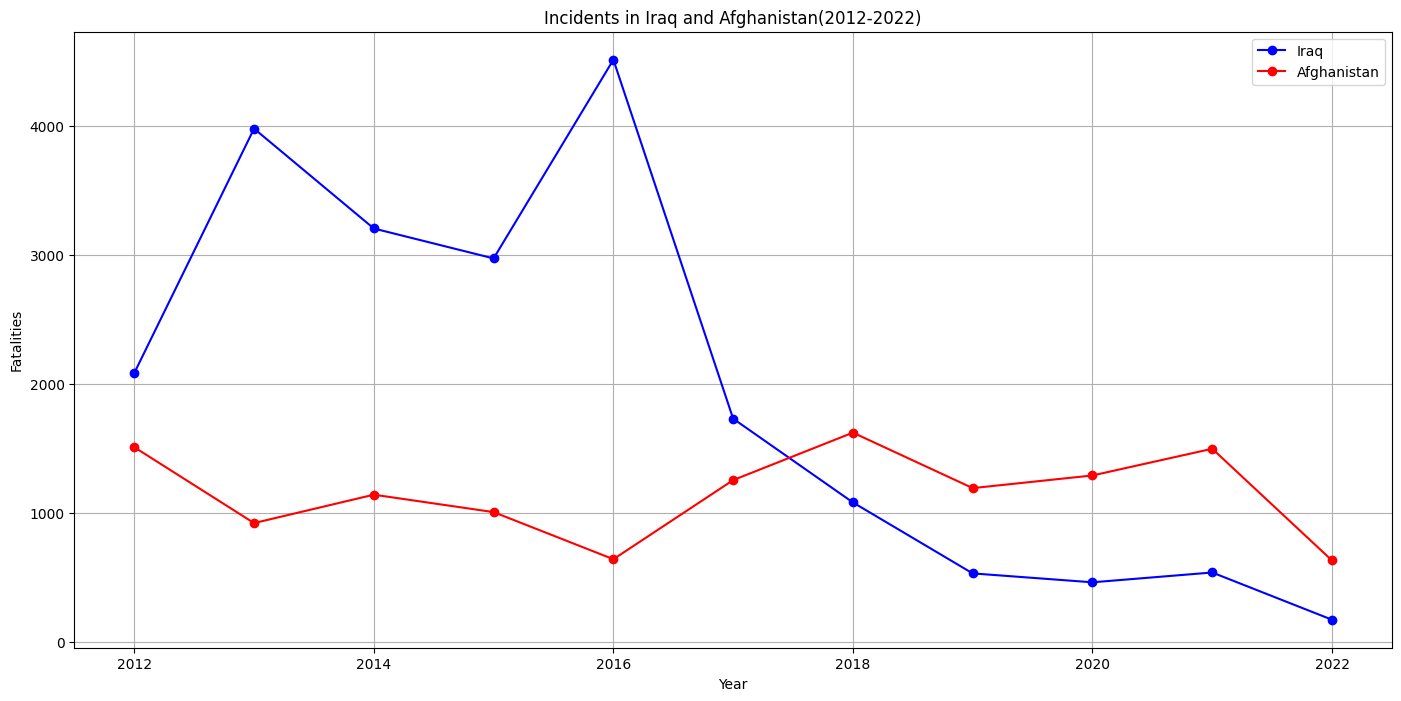

In [23]:
iraq_data=df[df['Country']=='Iraq']
afghanistan_data=df[df['Country']=='Afghanistan']

plt.figure(figsize=(17,8))
plt.plot(iraq_data['Year'],iraq_data['Fatalities'],label='Iraq',marker='o',linestyle='-',color='blue')
plt.plot(afghanistan_data['Year'],afghanistan_data['Fatalities'],label='Afghanistan',marker='o',linestyle='-',color='red')

plt.title("Incidents in Iraq and Afghanistan(2012-2022)")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.legend()
plt.grid(True)
plt.show()

**INSIGHTS:**

1. Both Iraq (represented by the blue line) and Afghanistan (represented by the red line) show a significant number of fatalities over this period, indicating the severe impact of these incidents in both countries.

2. Iraq had the highest number of fatalities in 2014, with around 4,000. This suggests that 2014 was a particularly deadly year in Iraq.

3. Afghanistan had its highest number of fatalities in 2018, with around 3,500, indicating a significant surge in deadly incidents during that year.

**Incident Analysis:**

From 2012 to 2022, countries like Iraq and Afghanistan experienced a significant number of incidents and fatalities. However, a decreasing trend in recent years suggests potential improvements in the situation.

### 10. visualize the correlation between different features such as Score, Incidents, Fatalities, Injuries, and Hostages in the dataset

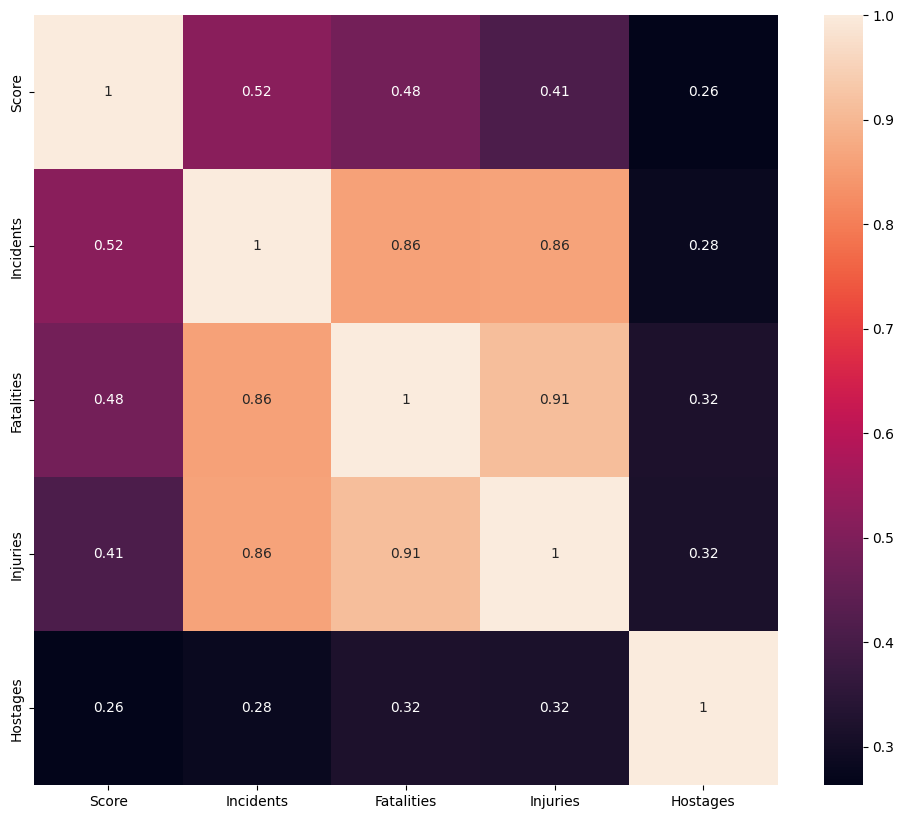

In [24]:
correlation_matrix=df[['Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

**INSIGHTS :**

1. Incidents and fatalities, as well as incidents and injuries, have strong positive correlations (0.86), indicating that as incidents increase, both fatalities and injuries tend to rise.
  
2. Fatalities and injuries are highly correlated (0.91), suggesting that incidents with more fatalities usually result in more injuries.

3. Hostages have the lowest correlation with other variables, showing they are less affected by incidents, fatalities, or injuries.

**Correlation Insights:**

The correlation matrix shows a strong positive relationship between incidents, fatalities, and injuries. This indicates that incidents with more fatalities also tend to have more injuries.

### 11.The relationship between the number of incidents and fatalities in each country over the years

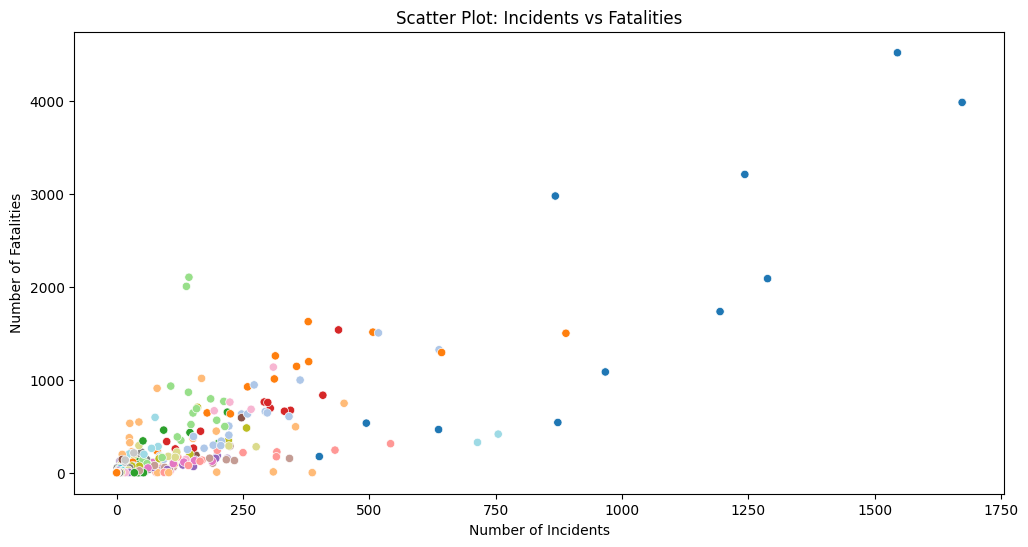

In [25]:
country_year_data = df.groupby(['Country', 'Year'])[['Incidents', 'Fatalities']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Incidents', y='Fatalities', data=df, hue='Country', palette='tab20', legend=None)
plt.title('Scatter Plot: Incidents vs Fatalities')
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Fatalities')
plt.show()

## CONCLUSION

Based on the analysis of the data and graphs, it can be concluded that from 2012 to 2022, countries like Iraq and Afghanistan experienced a significant number of incidents and fatalities. However, there has been a decreasing trend in recent years, suggesting an improvement in the situation. The correlation matrix indicates a strong positive relatio iship between the number of incidents, fatalities, and injuries, suggesting that incidents with a higher number of fatalities also tend to have more injuries. Despite these correlations, the number of hostages taken does not seem to be strongly influenced by these other variables. It's important to note that these insights are based on the available data and do not account for all possible factors. The complexity of these issues means that additional context and analysis would be beneficial for a more comprehensive understanding Furthermore, while these variables show a strong correlation, it doesn't necessarily mean that one variable's increase causes an increase in the other as correlation does not imply causation. Other factors could be influencing these relationships.